<a href="https://colab.research.google.com/github/Mousaabdi/Midterm_exam/blob/main/Midterm_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

     |████████████████████████████████| 13.7MB 328kB/s 
     |████████████████████████████████| 1.3MB 47.0MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt
import random

# Question 1

Suppose we want to find the integral of the function $f(x)$ shown below:

\begin{cases} 
  2 - 8x^2 & x\leq 0.5 \\
  0 & 0.5 < x 
\end{cases}

f(x) has the following plot:


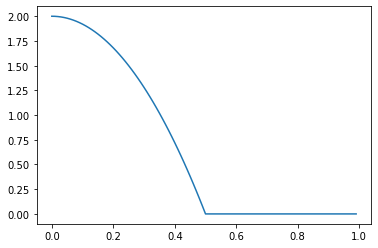

In [ ]:
def f(x):
    if x >= 0 and x <= 0.5:
        return 2 - 8 * x**2
    else:
        return 0

plt.plot([x/100 for x in range(0,100)], [f(x/100) for x in range(0,100)])

1. Suppose we run a Monte Carlo simulation and draw $n$ samples uniformly from [0,1].  Let $x_i$ be the $i^{\textrm{th}}$ sample.  Write the formula for the estimate of the integral of $f(x)$.

<center>$A \approx \frac{b - a}{n}\displaystyle\sum_{i}f(x)$</center>

2. For an estimate with 10 samples, on average, how many of the $x_i$'s be below 0.5?  What is the upper bound for the number of samples below 0.5?  What is the lower bound?

<center>
On average there will be 5 below and 5 above. The upper bound for samples below 0.5 is 10 and the lower bound is 0.
</center>

3. Suppose we only draw 5 samples uniformly, and then use antithetic draws for the other 5.  Give an example of what the 10 x_i's could look like.

<center>$X_i = {0.1, 0.9, 0.2, 0.8, 0.25, 0.75 ...}$</center>

4. Using the method in part 3., on average, how many will be below 0.5?  What is the upper bound for the number below 0.5?  What is the lower bound?

<center> there will always be 5 below and 5 above </center>

5. Would antithetic sampling reduce the variance of the estimate? Use Monte Carlo methods with both sampling methods and report on the variance of each method in your answer.  (Hint: you will want to run multiple small sample Monte Carlo methods)

(array([ 1.,  4.,  3., 12., 20., 16., 19., 15.,  6.,  4.]),
 array([0.32703671, 0.39303306, 0.45902941, 0.52502576, 0.59102211,
        0.65701846, 0.72301481, 0.78901116, 0.85500751, 0.92100385,
        0.9870002 ]),
 <a list of 10 Patch objects>)

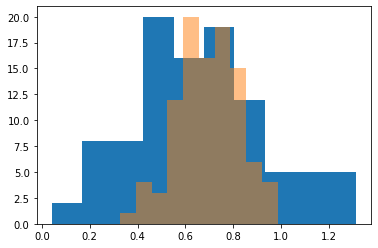

In [ ]:
samples = 10
simulations = 100



estimates = []
anti_estimates = []
for i in range(simulations):
    draws = []
    anti_draws = []
    for i in range(samples//2):
        draws.append(f(random.random()))
        draws.append(f(random.random()))
        anti_draw = random.random()
        anti_draws.append(f(anti_draw))
        anti_draws.append(f(1-anti_draw))
    estimates.append(sum(draws)/samples)
    anti_estimates.append(sum(anti_draws)/samples)

plt.hist(estimates)
plt.hist(anti_estimates, alpha=0.5)

6. Using the idea of importance sampling, draw samples from the uniform distribution between 0 and 0.5 such that $x \sim U_0^{0.5} $ .  What is the formula for the integral of $f(x)$ when you use this distribution?

<center>$A \approx \frac{1}{n}\displaystyle\sum_{i}f(x) \frac{p(x)}{p^*(x)}$

where $p(x) = 1$ and $p^*(x) = \frac{1}{0.5}=2$</center>
7. Is importance sampling better, worse, or the same compared to antithetic sampling? Why? Again, use Monte Carlo methods to compare importance sampling with antithetic sampling and the explain the results to answer the "Why?" portion of the question.

Importance sampling only slightly better because it has lower variance. With importance sampling you will divide every $f(x_i)$ in half. With antithetic sampling you will eectively divide every estimate $0 < xi < 0.5$ in half which is exactly 5 estimates. They do the same thing but importance sampling gets 10 estimates where antithetic gets only 5.

(array([ 4.,  5., 15., 15., 10., 15., 15., 12.,  8.,  1.]),
 array([0.32002361, 0.38573975, 0.4514559 , 0.51717204, 0.58288819,
        0.64860433, 0.71432047, 0.78003662, 0.84575276, 0.91146891,
        0.97718505]),
 <a list of 10 Patch objects>)

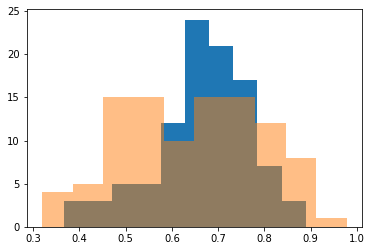

In [ ]:
samples = 10
simulations = 100



importance_estimates = []
anti_estimates = []
for i in range(simulations):
    draws = []
    anti_draws = []
    for i in range(samples//2):
        draws.append(f(random.uniform(0, 0.5))/2)
        draws.append(f(random.uniform(0, 0.5))/2)
        anti_draw = random.random()
        anti_draws.append(f(anti_draw))
        anti_draws.append(f(1-anti_draw))
    importance_estimates.append(sum(draws)/samples)
    anti_estimates.append(sum(anti_draws)/samples)

plt.clf()
plt.hist(importance_estimates)
plt.hist(anti_estimates, alpha=0.5)

# Question 2

You oversee the regional shipping center for a specialized shipping company that has 2 warehouses available. Does this sound familiar? It is but pay attention because the problem has changed from the one solved in class.

The company specializes in high risk shipments and only handles 2 types: Livestock and Biohazard. Each type of shipment has a specific setup cost and a per shipment profit associate with it.  You can find this in the table below:

|Shipment Type |  Setup cost (\$) | Profit (\$) |
|---|---|---|
|Livestock | 22500 | 6 |
|Biohazard | 38000 | 8 |

Each warehouse has a different shipping rates (number of units shipped) or each type of shipment.  The shipping rates for each type in units shipped per hour are listed below:

||Livestock | Biohazard |
|---|---|---|
|Warehouse 1 | 104 | 76 |
|Warehouse 2 | 84 | 46 |

Warehouses 1 has 240 hours of time available for shipments.  Additionally, warehouse 2 has 360 hours available for shipments. You need to decide which of these types of shipments should be handled by each location. More specifically, you should determine how many of each type are shipped from each warehouse to maximize profit. Use OR-tools to define an integer programming model and solve for the optimal solution.  Please make sure your answer is easily recognizable and that your code is included.  The answers to the following questions should be easy to spot in your code: 

1. What variables will you need to define?
2. What is your objective function?
3. Please list all necessary constraints.

In [ ]:
solver = pywraplp.Solver.CreateSolver('SCIP')

warehouse_hours = [240, 360]
ship_types = ["livestock","bio"]

ship_rate = {
    (0, "livestock"): 104,
    (0, "bio"): 76,
    (1, "livestock"): 84,
    (1, "bio"): 46
}

ship_profit = {"livestock": 6, "bio": 8}
setup_cost = {"livestock": 22500, "bio": 38000}

ship_locations = {(w, ship): solver.IntVar(0, 1, str(w) + "_" + ship) for w in range(len(warehouse_hours)) for ship in ship_types}
shipments = {(w, ship): solver.IntVar(0, solver.infinity(), "units_shipped_" + str(w) + "_" + ship) for w in range(len(warehouse_hours)) for ship in ship_types}

# objective
solver.Maximize(sum([ship_profit[ship] * (shipments[(0, ship)] + shipments[(1, ship)]) - setup_cost[ship] * (ship_locations[(0, ship)] + ship_locations[(1, ship)]) for ship in ship_types]))

# constraints
for w in range(len(warehouse_hours)):
  solver.Add(shipments[(w, "livestock")]/ship_rate[(w, "livestock")] + shipments[(w, "bio")]/ship_rate[(w, "bio")] <= warehouse_hours[w]) # if -> then constraint
  
for key in ship_rate:
  solver.Add(shipments[key] <= ship_rate[key] * warehouse_hours[key[0]] * ship_locations[key])

status = solver.Solve()

if status == solver.OPTIMAL:
  for k in shipments:
    print(f'(location, shipments): {k}, value: {shipments[k].solution_value()}')

(location, shipments): (0, 'livestock'), value: 24960.0
(location, shipments): (0, 'bio'), value: 0.0
(location, shipments): (1, 'livestock'), value: 30240.0
(location, shipments): (1, 'bio'), value: 0.0
